In [16]:
89

89

In [17]:
from typing import Annotated

from langchain_core.messages import AnyMessage, AIMessage

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from langgraph.types import interrupt, Command
from dotenv import load_dotenv
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage

import os 
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()


True

In [18]:
load_dotenv()

model = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [19]:
class substate(TypedDict):
    input_text: str
    translated_text: str


In [20]:
def translated_text(state: substate):
    promt = f""" translate the following text in hindi
    keep it simple and clear  just give the main content 
    test:
    {state['input_text']}

      """


    translated_text = model.invoke(promt).content
    return {"translated_text": translated_text}

In [21]:
sub_graph_builder = StateGraph(substate)

sub_graph_builder.add_node('translated_text',translated_text)


sub_graph_builder.add_edge(START, 'translated_text')
sub_graph_builder.add_edge('translated_text',END)
subgraph = sub_graph_builder.compile()

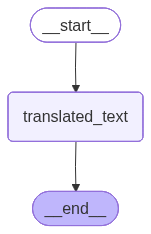

In [22]:
subgraph

In [23]:
class ParentState(TypedDict):
    question: str
    answer_eng: str  
    answer_hindi: str

In [24]:
def GenearteAnswer(state:ParentState):
    promt = f""" ans the following Question i simmple and give just the ans no extra thingd 
    question :
    {state["question"]}
    
     """
    answer_eng = model.invoke(promt).content

    return {"answer_eng":answer_eng}
    

In [25]:
def trnslate_ans(state:ParentState):


    answer_hindi = subgraph.invoke({'input_text': state['answer_eng']})

    return {"answer_hindi":answer_hindi}

In [26]:
builder = StateGraph(ParentState)

builder.add_node("answer",GenearteAnswer )
builder.add_node("translate", trnslate_ans)

In [27]:
builder.add_edge(START, "answer")
builder.add_edge("answer", "translate")
builder.add_edge("translate", END)


In [28]:
graph = builder.compile()

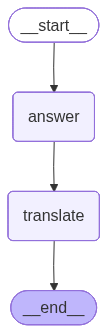

In [29]:
graph

In [31]:
graph.invoke({"question": "write a eassay on india"})

ChatGoogleGenerativeAIError: Error calling model 'gemini-2.5-flash' (RESOURCE_EXHAUSTED): 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash\nPlease retry in 38.412012095s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerDayPerProjectPerModel-FreeTier', 'quotaDimensions': {'model': 'gemini-2.5-flash', 'location': 'global'}, 'quotaValue': '20'}]}, {'@type': 'type.googleapis.com/google.rpc.RetryInfo', 'retryDelay': '38s'}]}}